# Train Over Tracks Classifier

### Reading in Data

In [12]:
import pandas as pd
import numpy as np
from PIL import Image

In [33]:
crossing_images = pd.read_csv("../data/bw_trains.csv")

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
crossing_images

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,110583,110584,110585,110586,110587,110588,110589,110590,110591,110592
0,0,42,42,43,43,44,44,45,45,45,...,22,22,22,22,22,22,22,22,22,0
1,1,109,109,109,110,110,111,111,112,113,...,34,34,34,34,34,34,34,34,34,0
2,2,164,164,164,165,166,166,167,167,165,...,61,64,60,56,56,59,63,65,66,0
3,3,164,164,164,165,166,166,167,167,174,...,48,52,50,47,44,44,47,50,52,0
4,4,161,161,161,162,163,163,164,164,165,...,58,61,59,57,56,56,57,59,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,165,65,65,65,66,67,67,68,68,68,...,26,26,26,26,26,26,26,26,26,1
166,166,136,137,137,138,138,139,139,139,141,...,53,51,53,55,54,52,51,53,55,1
167,167,146,146,147,147,148,148,149,149,151,...,58,56,56,56,53,52,54,59,64,1
168,168,144,145,145,146,146,147,147,147,146,...,54,57,58,56,54,51,53,58,63,1


In [35]:
y = crossing_images["110592"]
x = crossing_images.drop(["110592","Unnamed: 0"],axis=1)
print(y.shape)
print(x.shape)

(170,)
(170, 110592)


In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [49]:
def maximize_pca(x):
    prop_of_var = {'n_components': [], 'total_varience': []}
    total_ex_var = 0
    n = 1
    while total_ex_var < 90 and n < 100:
        pca = PCA(n_components=n)
        trains_fullsize_reduced_x = pca.fit_transform(x)
        total_ex_var = sum(pca.explained_variance_ratio_)
        prop_of_var['n_components'].append(n)
        prop_of_var['total_varience'].append(total_ex_var)
        n+=2
        if(n%10 == 0):
            print(n)
    return prop_of_var

Text(0, 0.5, 'Proportion of the Variance Explained')

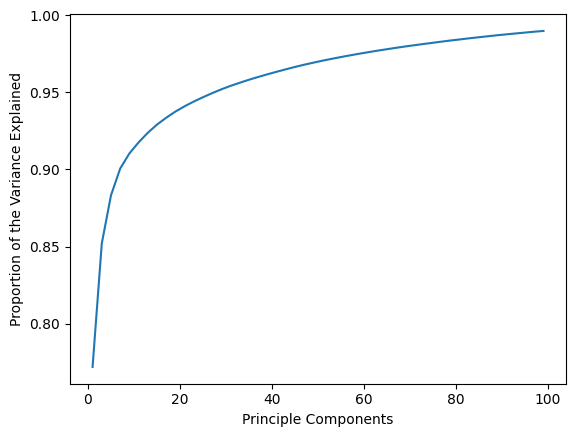

In [50]:
prop_of_var = maximize_pca(x)
plt.plot(prop_of_var['n_components'], prop_of_var['total_varience']);
plt.xlabel('Principle Components')
plt.ylabel('Proportion of the Variance Explained')

In [66]:
# pca = PCA(n_components=60)

# trains_fullsize_reduced_x = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=21)

In [65]:
from joblib import dump, load
dump(pca, '../src/model/transform.joblib')

['../src/model/transform.joblib']

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [89]:
# input_nodes = x.shape[1]
# output_nodes = 2
# n_neurons = int(np.floor(input_nodes/(2*(x.shape[0]+output_nodes))))
scaler = StandardScaler()
mlp = MLPClassifier(hidden_layer_sizes=(4,3),max_iter=1000,random_state=20)
pca = PCA(5)
nn_pipe = Pipeline(steps=[("scaler",scaler),("pca",pca),("mlp",mlp)])

In [90]:
# nn_pipe.fit(x_train.values,y_train.values)
nn_pipe.fit(x_train.values,y_train.values)
y_pred = nn_pipe.predict(x_test.values)
nn_cm = confusion_matrix(y_test,y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred)}")
print(f"AUC: {roc_auc}")

Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.9375
F1-Score: 0.967741935483871
AUC: 0.96875


/Users/nicholasfarkas/Downloads/Projects/Train-Over_Tracks/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
import pickle

In [29]:
with open('tot_model', 'wb') as fh:
   pickle.dump(nn_pipe, fh)

In [91]:
from joblib import dump, load
dump(nn_pipe, '../src/model/model.joblib')

['../src/model/model.joblib']